# Proyecto 1, *Prices : Advanced Regression Techniques*

In [1]:
#Modulos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
from scipy.stats import skew, kurtosis, chi2
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn import tree

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR

from sklearn.ensemble import StackingRegressor

## Varibales de entrada (descripción)

Descripción de las variables de entrada:
* SalePrice: el precio de venta de la propiedad en dólares. Esta es la variable objetivo que está tratando de predecir.
* MSSubClass: la clase de construcción
* MSZoning: la clasificación general de zonificación
* LotFrontage: pies lineales de calle conectados a la propiedad
* LotArea: Tamaño del lote en pies cuadrados
* Calle: Tipo de acceso por carretera
* Callejón: Tipo de acceso al callejón
* LotShape: forma general de la propiedad
* LandContour: Planitud de la propiedad
* Utilidades: tipo de utilidades disponibles
* LotConfig: configuración del lote
* LandSlope: Pendiente de la propiedad
* Vecindario: ubicaciones físicas dentro de los límites de la ciudad de Ames
* Condition1: Proximidad a la carretera principal o al ferrocarril
* Condición 2: Proximidad a la carretera principal o ferrocarril (si hay un segundo)
* BldgType: Tipo de vivienda
* HouseStyle: estilo de vivienda
* OverallQual: Material general y calidad de acabado.
* OverallCond: Calificación de estado general
* YearBuilt: fecha de construcción original
* YearRemodAdd: fecha de remodelación
* RoofStyle: Tipo de techo
* RoofMatl: material del techo
* Exterior1st: Revestimiento exterior de la casa
* Exterior2nd: Revestimiento exterior de la casa (si hay más de un material)
* MasVnrType: tipo de chapa de mampostería
* MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
* ExterQual: Calidad del material exterior
* ExterCond: Estado actual del material en el exterior
* Fundación: Tipo de fundación
* BsmtQual: Altura del sótano
* BsmtCond: Estado general del sótano
* BsmtExposure: Paredes de sótano a nivel de jardín o de salida
* BsmtFinType1: Calidad del área terminada del sótano
* BsmtFinSF1: pies cuadrados terminados tipo 1
* BsmtFinType2: Calidad de la segunda área terminada (si está presente)
* BsmtFinSF2: pies cuadrados con acabado tipo 2
* BsmtUnfSF: pies cuadrados sin terminar de área del sótano
* TotalBsmtSF: Total de pies cuadrados de área del sótano
* Calefacción: Tipo de calefacción
* Calefacción QC: calidad y estado de la calefacción
* CentralAir: aire acondicionado central
* Eléctrico: sistema eléctrico
* 1stFlrSF: pies cuadrados del primer piso
* 2ndFlrSF: pies cuadrados del segundo piso
* LowQualFinSF: pies cuadrados con acabado de baja calidad (todos los pisos)
* GrLivArea: pies cuadrados de área habitable sobre el nivel (suelo)
* BsmtFullBath: Baños completos en el sótano
* BsmtHalfBath: Medios baños en el sótano
* FullBath: baños completos sobre rasante
* HalfBath: Medios baños sobre el nivel del suelo
* Dormitorio: número de dormitorios sobre el nivel del sótano
* Cocina: Número de cocinas
* KitchenQual: calidad de la cocina
* TotRmsAbvGrd: Total de habitaciones sobre rasante (no incluye baños)
* Funcional: clasificación de funcionalidad del hogar
* Chimeneas: Número de chimeneas
* FireplaceQu: Calidad de chimenea
* GarageType: Ubicación del garaje
* GarageYrBlt: año en que se construyó el garaje
* GarageFinish: Acabado interior del garaje
* GarageCars: Tamaño del garaje en capacidad de automóvil
* GarageArea: Tamaño del garaje en pies cuadrados
* GarageQual: Calidad de garaje
* GarageCond: Estado del garaje
* PavedDrive: entrada pavimentada
* WoodDeckSF: Área de la plataforma de madera en pies cuadrados
* OpenPorchSF: Área de porche abierto en pies cuadrados
* Porche cerrado: área de porche cerrado en pies cuadrados
* 3SsnPorch: Área de porche de tres estaciones en pies cuadrados
* ScreenPorch: área del porche de la pantalla en pies cuadrados
* PoolArea: Área de la piscina en pies cuadrados
* PoolQC: Calidad de la piscina
* Valla: calidad de la valla
* MiscFeature: característica miscelánea no cubierta en otras categorías
* MiscVal: \$ Valor de la función miscelánea
* MoSold: Mes vendido
* YrSold: año vendido
* SaleType: Tipo de venta
* SaleCondition: Condición de venta

## Cargar los datos

En esté proyecto tenemos como objetivo predecir el *SalePrice* de una casa, que está en función de las variables:

In [2]:
df_train = pd.read_csv('Data/train.csv', sep = ',')
df_test = pd.read_csv('Data/test.csv', sep = ',')
print(df_train.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [3]:
print(df_test.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

Donde, cada varibale cuenta con la siguiente cantidad de registros:

In [4]:
valores = df_train.columns.values
for i in range(80):
    print(str(valores[i]) + ": " + str(len(df_train[valores[i]])))

Id: 1460
MSSubClass: 1460
MSZoning: 1460
LotFrontage: 1460
LotArea: 1460
Street: 1460
Alley: 1460
LotShape: 1460
LandContour: 1460
Utilities: 1460
LotConfig: 1460
LandSlope: 1460
Neighborhood: 1460
Condition1: 1460
Condition2: 1460
BldgType: 1460
HouseStyle: 1460
OverallQual: 1460
OverallCond: 1460
YearBuilt: 1460
YearRemodAdd: 1460
RoofStyle: 1460
RoofMatl: 1460
Exterior1st: 1460
Exterior2nd: 1460
MasVnrType: 1460
MasVnrArea: 1460
ExterQual: 1460
ExterCond: 1460
Foundation: 1460
BsmtQual: 1460
BsmtCond: 1460
BsmtExposure: 1460
BsmtFinType1: 1460
BsmtFinSF1: 1460
BsmtFinType2: 1460
BsmtFinSF2: 1460
BsmtUnfSF: 1460
TotalBsmtSF: 1460
Heating: 1460
HeatingQC: 1460
CentralAir: 1460
Electrical: 1460
1stFlrSF: 1460
2ndFlrSF: 1460
LowQualFinSF: 1460
GrLivArea: 1460
BsmtFullBath: 1460
BsmtHalfBath: 1460
FullBath: 1460
HalfBath: 1460
BedroomAbvGr: 1460
KitchenAbvGr: 1460
KitchenQual: 1460
TotRmsAbvGrd: 1460
Functional: 1460
Fireplaces: 1460
FireplaceQu: 1460
GarageType: 1460
GarageYrBlt: 1460
G

In [5]:
print(df_train.shape)


(1460, 81)


Ahora veamos nuestra tabla de entrenamiento 

In [6]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


y la tabla de prueba

In [7]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


Mientras que la tabla de prueba cuenta con la siguiente cantidad de ejercicios:

In [8]:
print(df_test.shape)

(1459, 80)


## Objetivo

A partir de 79 variables independientes bucaremos predecir la variable dependiente $SalePrice$, las variables de entrada describen (casi) todos los aspectos de las viviendas residenciales en Ames y Iowa.

Visualicemos la variable objetivo

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882876
Kurtosis: 6.536282


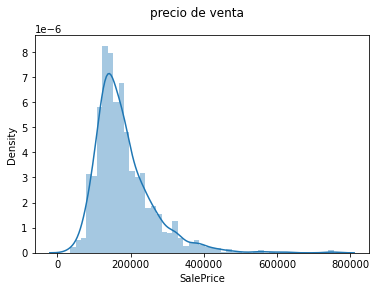

In [9]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "precio de venta")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Como una primer intuición uno pensaría que tiene una distribución normal, pero observemos que tiene colas pesadas, esto tambien nos hace pensar que tiene datos atipicos, lo cual se analizara mas adelante, primero veamos si es cierto que tiene una distribución normal, para esto ocuparemos el test de Jarque-Bera y Shapiro.

In [10]:
# Jarque-Bera
# ==========================================

x = df_train['SalePrice'].values
x_size = len(x)

# estadisticas
x_mean = np.mean(x)
x_std = np.std(x) 
x_skew = skew(x)
x_kurt = kurtosis(x) 
x_var_95 = np.percentile(x,5)
x_cvar_95 = np.mean(x[x <= x_var_95])
jb = x_size/6*(x_skew**2 + 1/4*x_kurt**2)
p_value = 1 - chi2.cdf(jb, df=2)
is_normal = (p_value > 0.05) # equivalentemente jb < 6

In [11]:
is_normal

False

In [12]:
# Shapiro-Wilk 
# ==========================================
shapiro_test = stats.shapiro(x)
shapiro_test

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

Por lo tanto no se distribuye normal.

Peroooo,podemos aplicar una transformación de registro para corregir el sesgo positivo en los datos, tomar registros significa que los errores en la predicción de casas caras y baratas afectarán el resultado por igual


C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


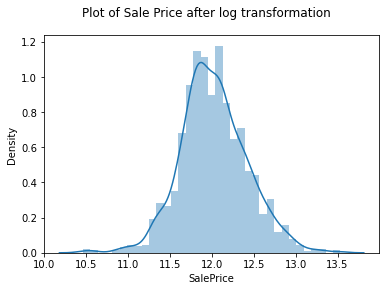

In [13]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [14]:
x = df_train['SalePrice'].values
x_size = len(x)

# estadisticas
x_mean = np.mean(x)
x_std = np.std(x) 
x_skew = skew(x)
x_kurt = kurtosis(x) 
x_var_95 = np.percentile(x,5)
x_cvar_95 = np.mean(x[x <= x_var_95])
jb = x_size/6*(x_skew**2 + 1/4*x_kurt**2)
p_value = 1 - chi2.cdf(jb, df=2)
is_normal = (p_value > 0.05) # equivalentemente jb < 6

In [15]:
is_normal

False

## Estadisticas descriptivas

A partir de esté momento solo trabajaremos con la tabla *train_df*. Primero analisemos nuestra variable objetivo 

In [16]:
df_train['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

Notemos que de lo anterior, la media de *SalesPrice* es *180921.195890*, el maximo *755000* y el minimo *755000*. Lo anterior nos hace pensar que hay valores atipicos, es decir, existen algunas casas que tienen un precio demasiado elevado.

Lo siguiente es identificar las variables que tienen una mayor correlación entre ellas, esto nos permite o nos va a permitir selecciónar variables para nuestro(s) modelo(s).

Text(133.44000000000005, 0.5, 'Variables')

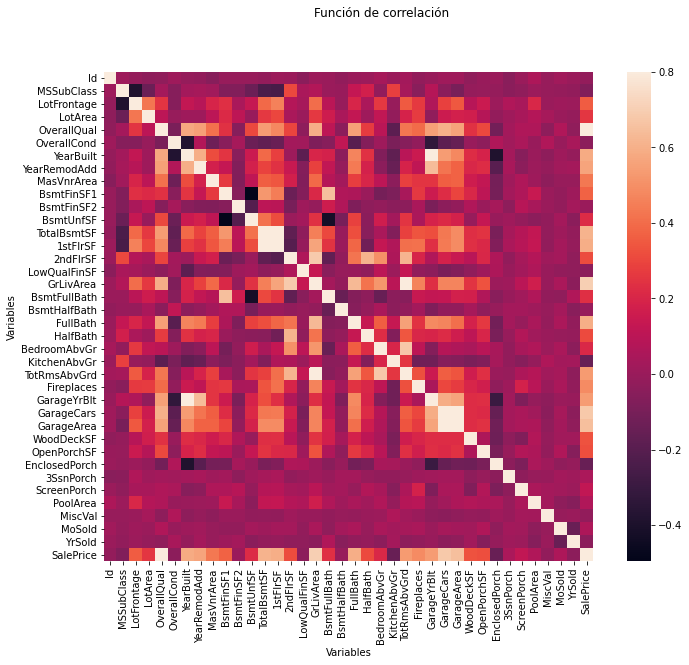

In [17]:
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Función de correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")

Text(71.5, 0.5, 'Variables')

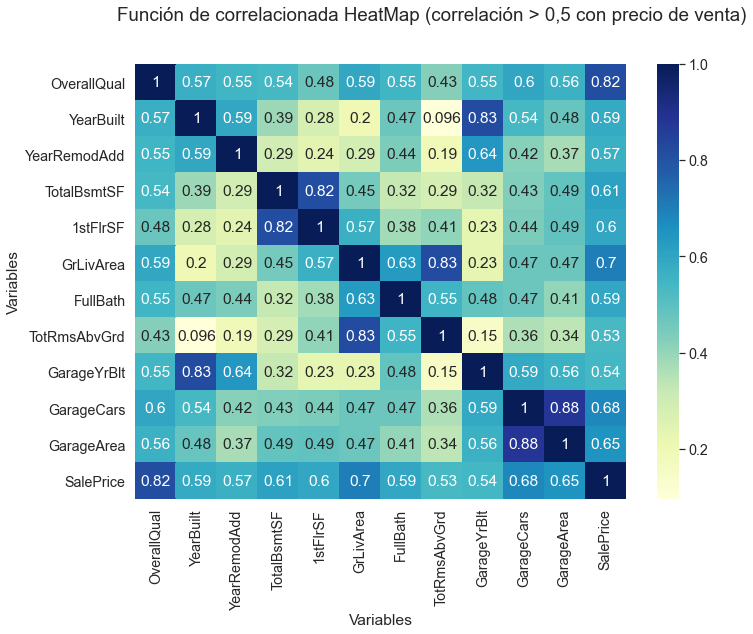

In [18]:
corr_mat = df_train.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Función de correlacionada HeatMap (correlación > 0,5 con precio de venta)")
plt.xlabel("Variables")
plt.ylabel("Variables")

Ahora visualicemos aquellas variables que no tienen una alta correlación.

In [19]:
print("valores de correlación")

corr = df_train.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

valores de correlación
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice

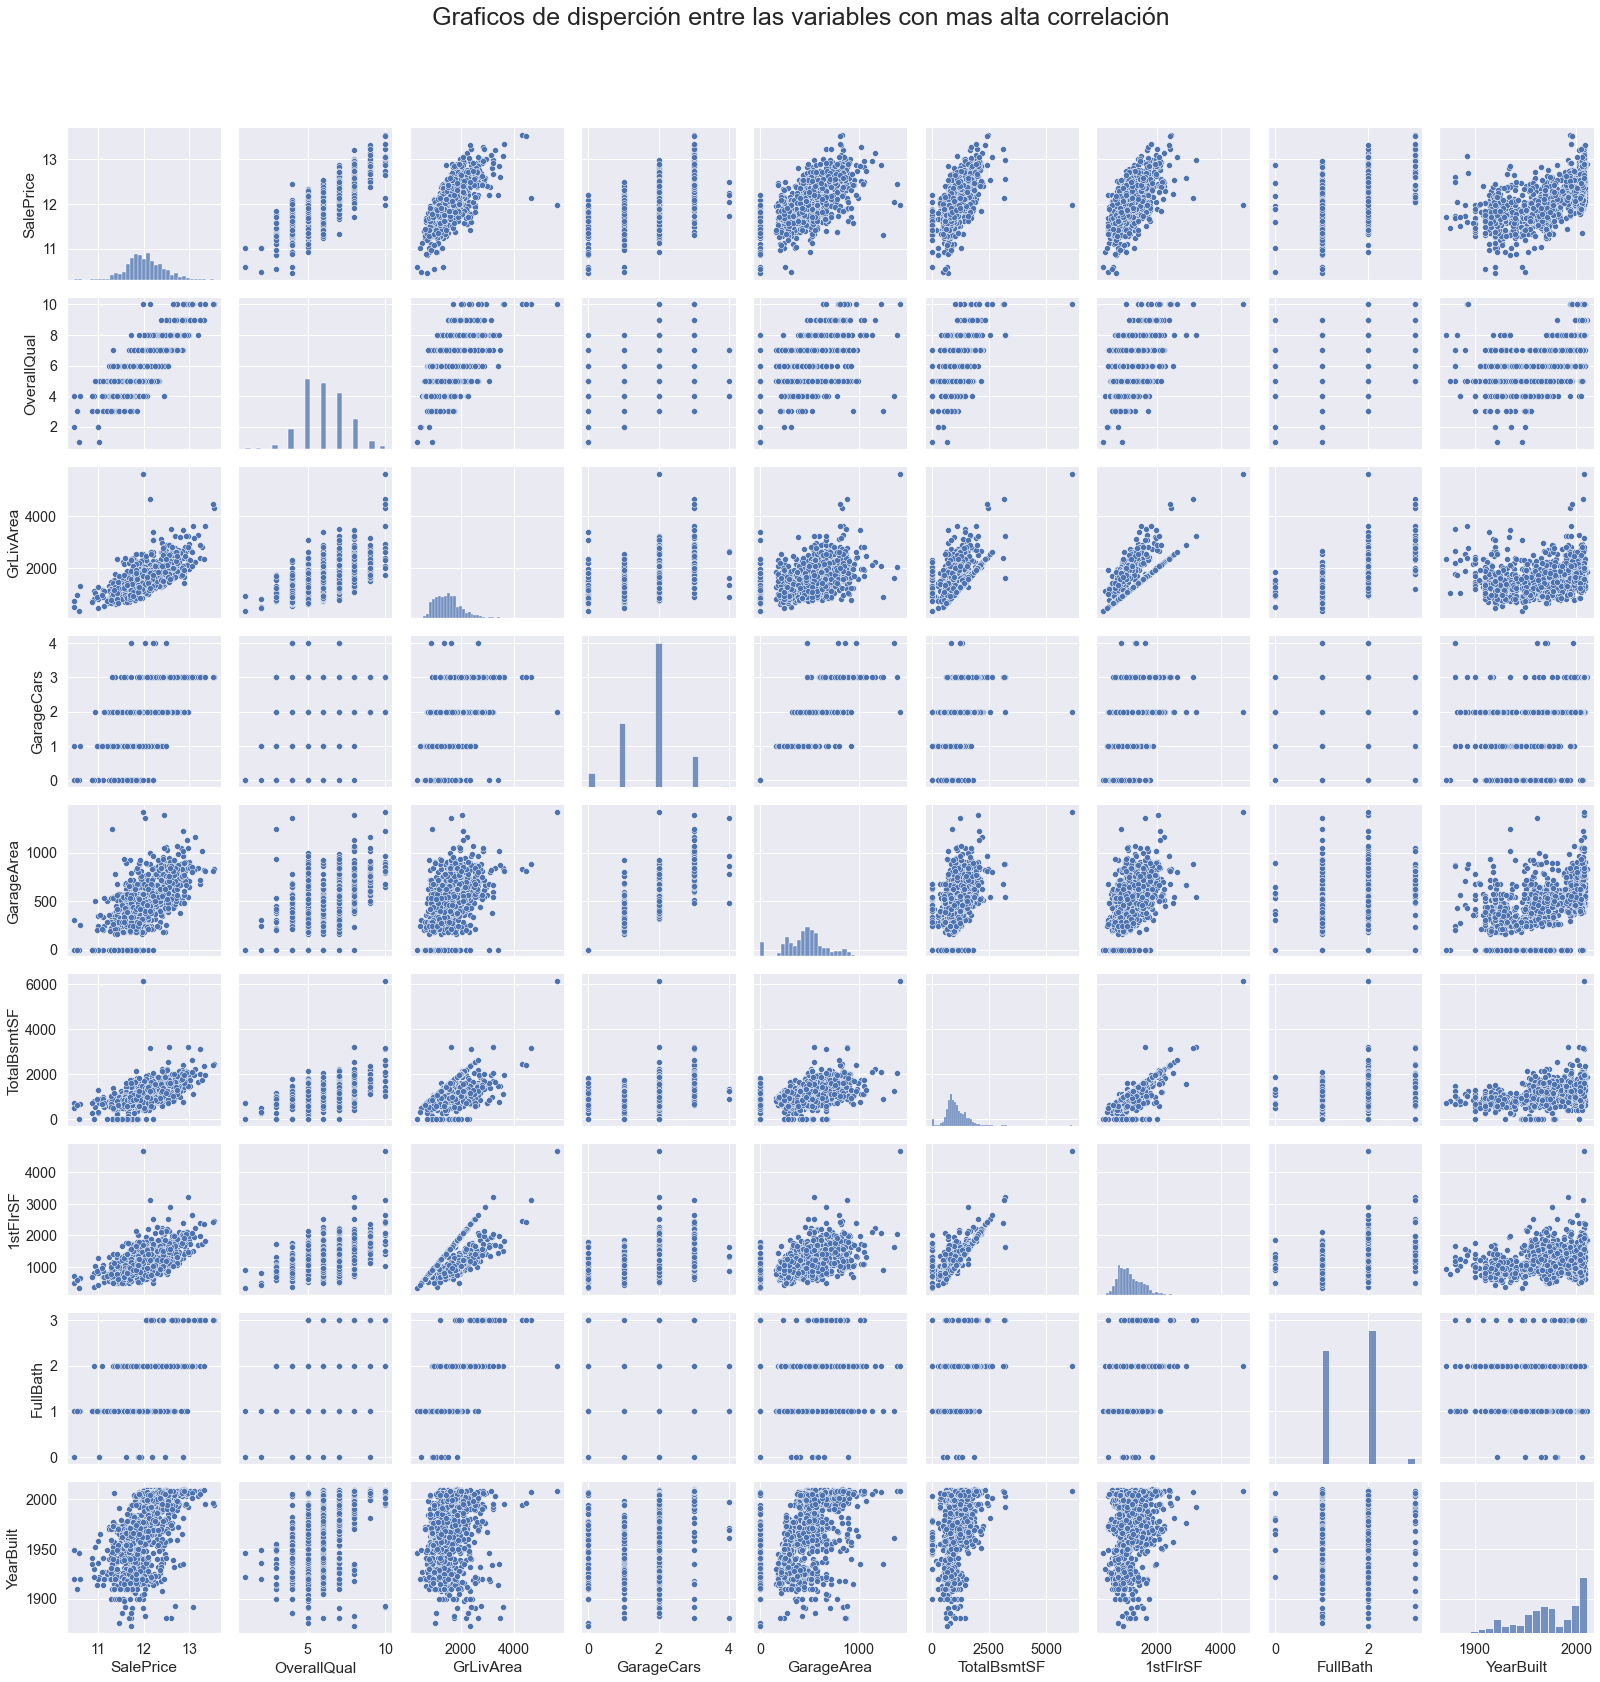

In [20]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Graficos de disperción entre las variables con mas alta correlación', y=1.04, size=25)
plt.tight_layout()
plt.show()

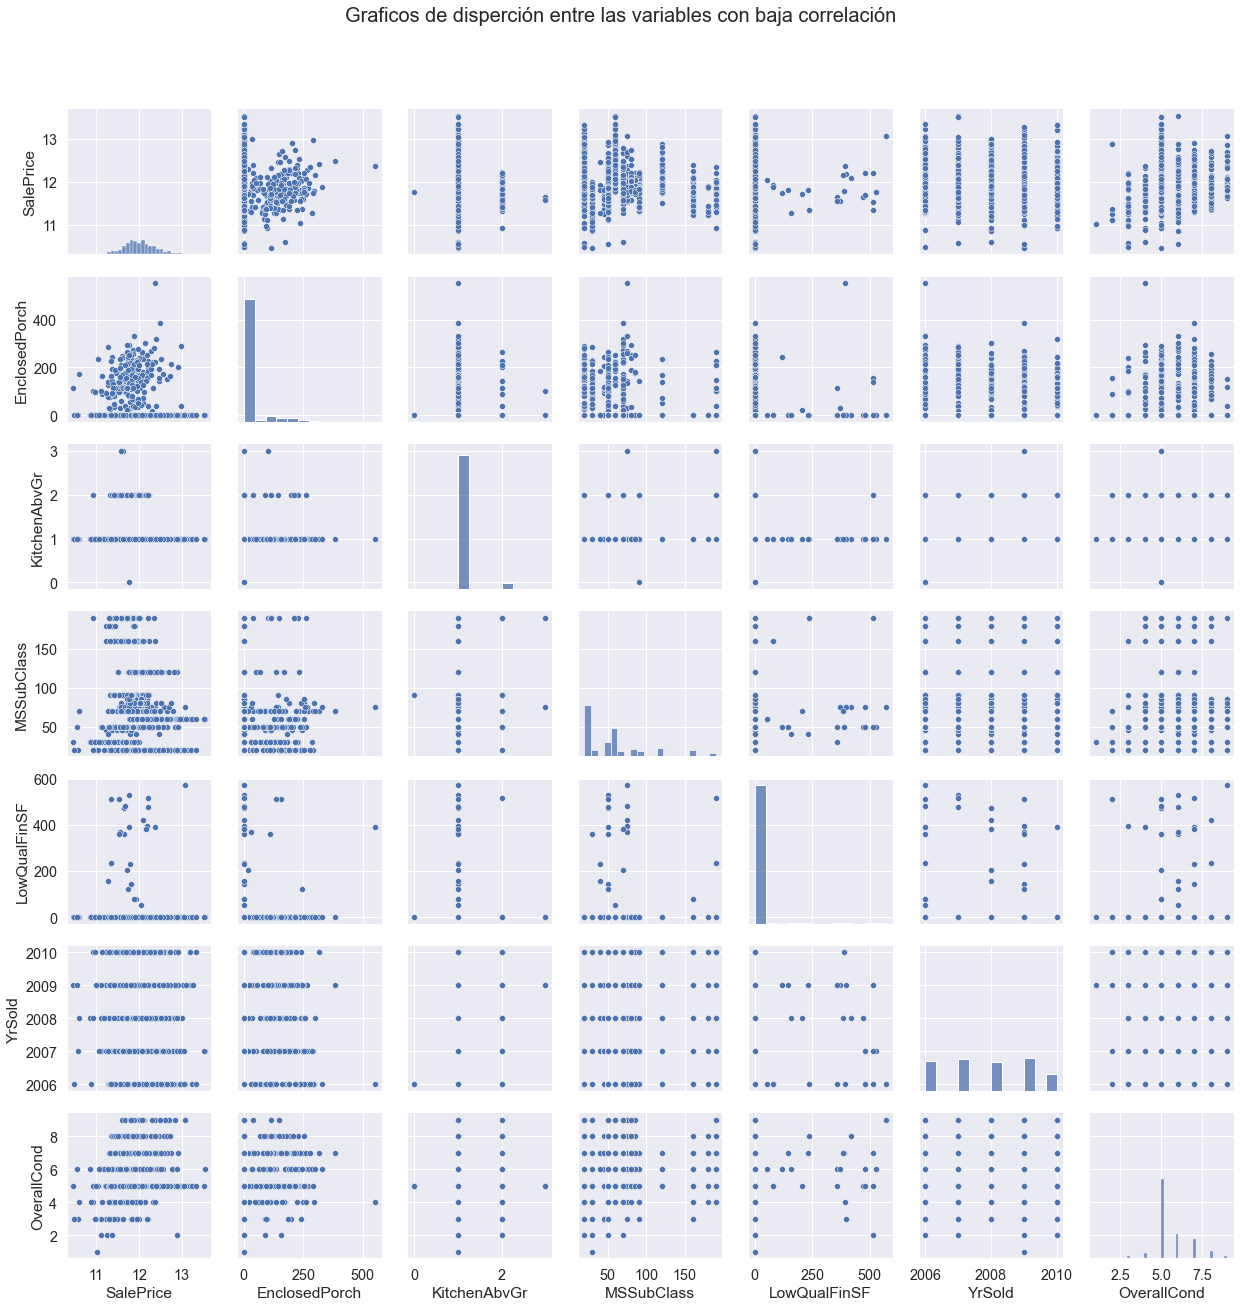

In [21]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Graficos de disperción entre las variables con baja correlación', y=1.04, size=20)
plt.tight_layout()
plt.show()

## Analisis de valores atipicos

Como se menciono anteriormente, puede ser que existan datos atipicos, ya que hay precios de casas que están por encima de la media, para esto, realizaremos el siguiente analisis. Para esto quitaremos la variable *ID* ya que no aporta información relevante.


In [22]:
#id será eliminado, ya que no es necesario para el entrenamiento o la predicción
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

Ahora nos auxiliaremos de metodos graficos para identidicar que variables tienen datos atipicos 

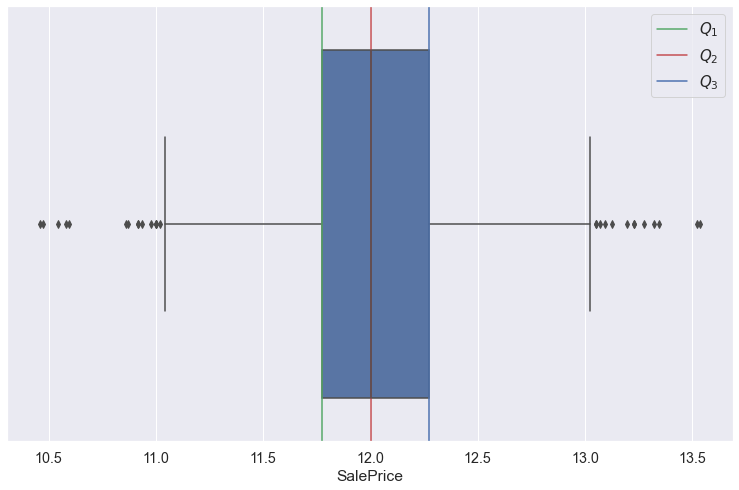

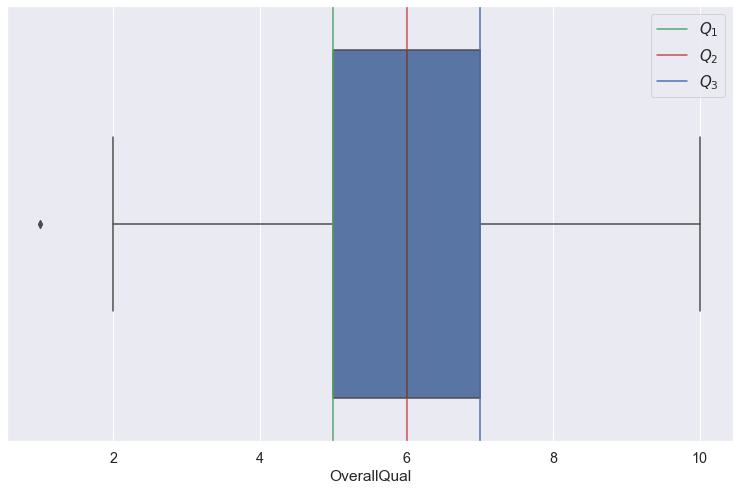

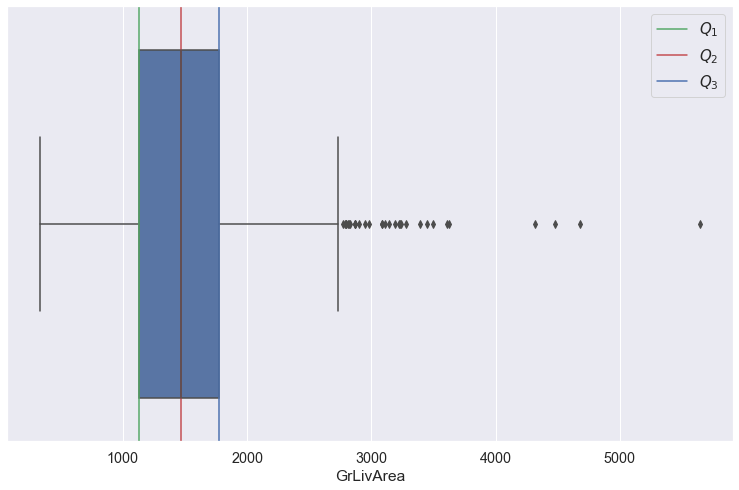

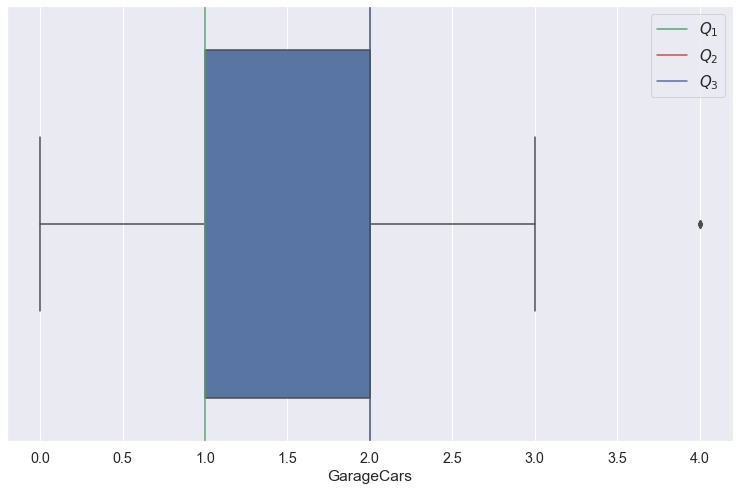

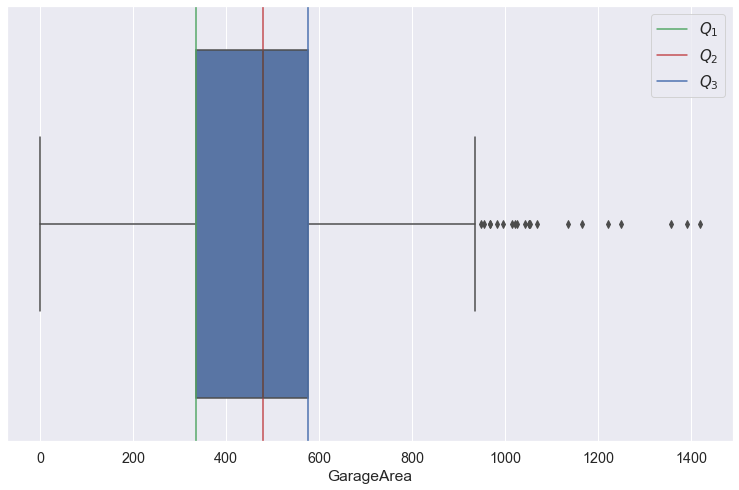

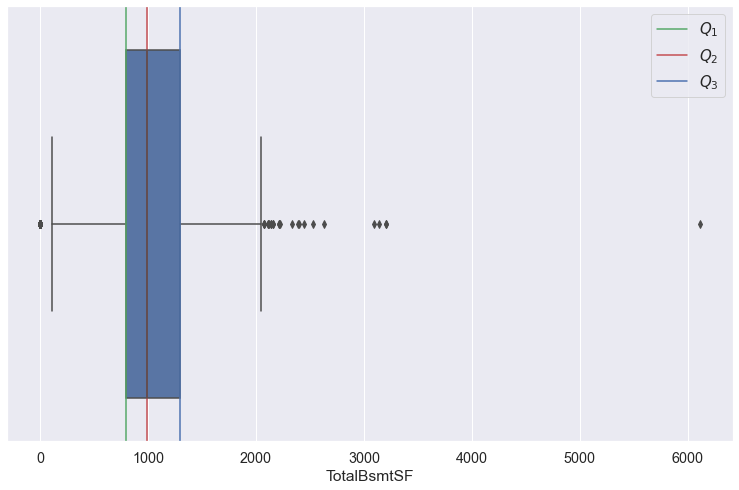

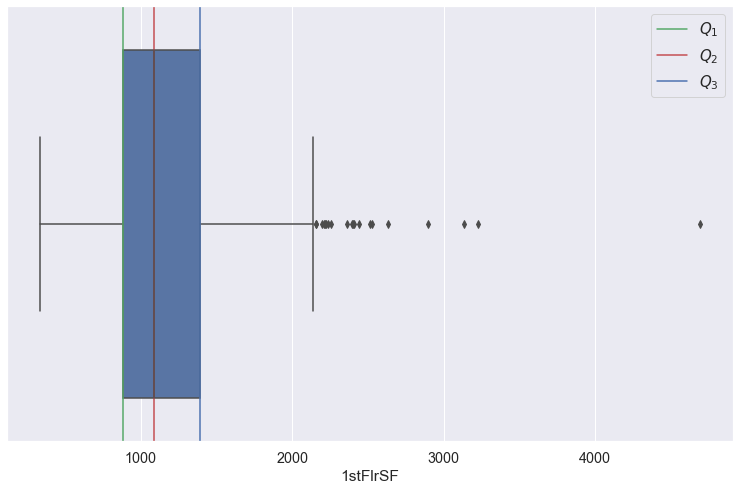

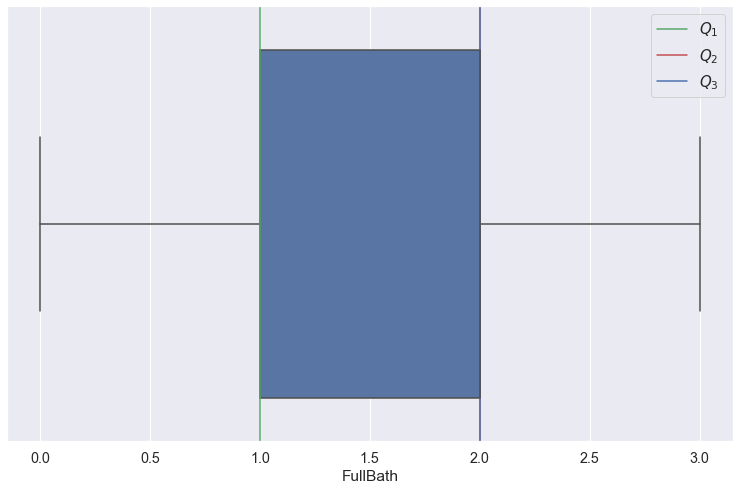

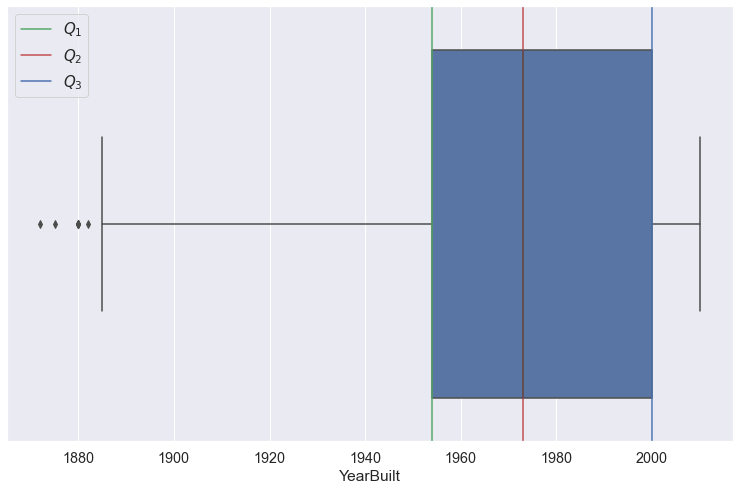

In [23]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']

for i in cols:
    fig, ax = plt.subplots(figsize = (13, 8))

    sns.boxplot(x = df_train[i], ax = ax)
    ax.axvline(np.percentile(df_train[i], 25), color = 'g', label = '$Q_1$')
    ax.axvline(np.percentile(df_train[i], 50), color = 'r', label = '$Q_2$')
    ax.axvline(np.percentile(df_train[i], 75), color = 'b', label = '$Q_3$')
    ax.legend(prop = {'size' : 15});

De lo anterior podemos confirmar lo antes mencionado, la variable *SalePrice* tiene datos atipicos, ademas:

1. OveralQual
2. GrLivArea
3. GarageCars
4. Garage Area
5. TotalBsmtSF
6. 1stfirSF
7. FullBath
8. YearBuilt



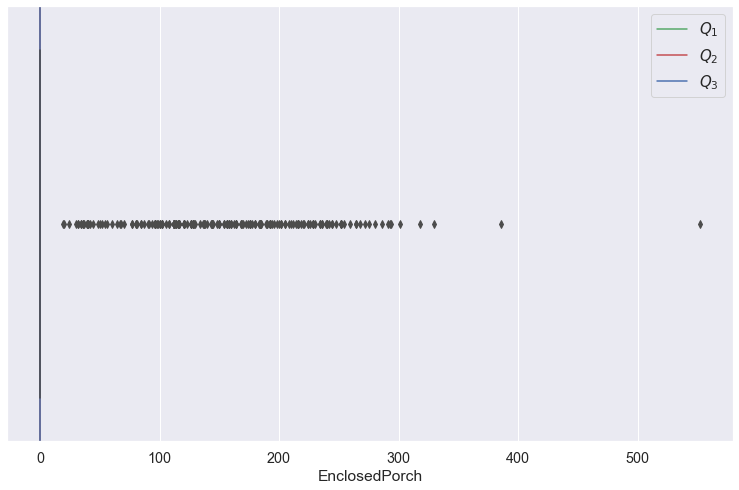

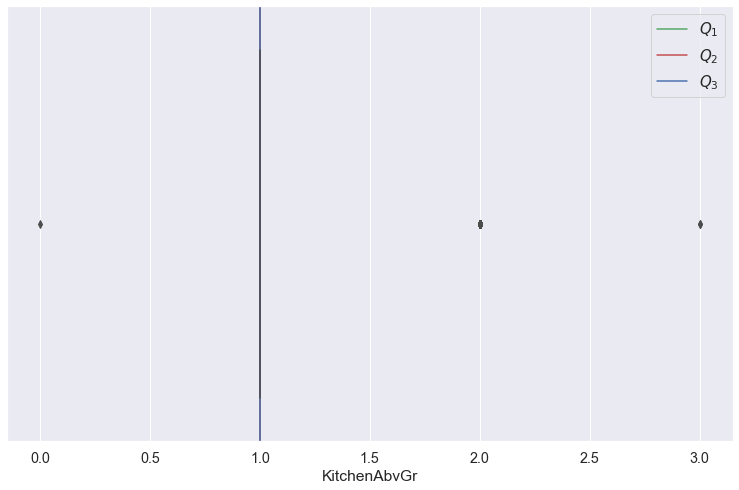

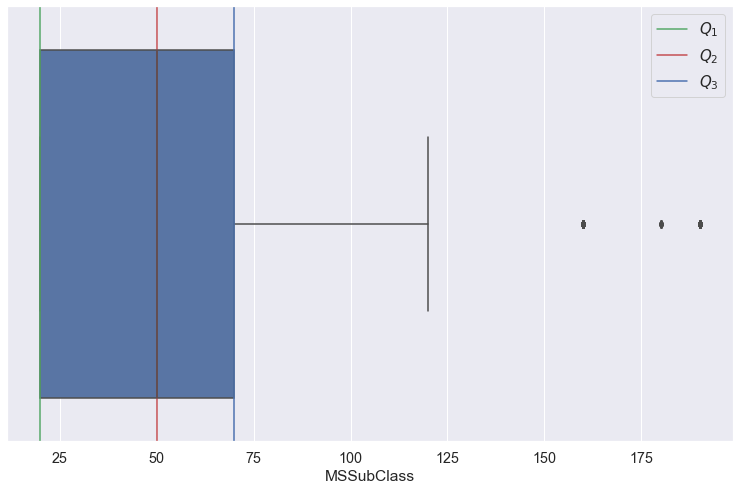

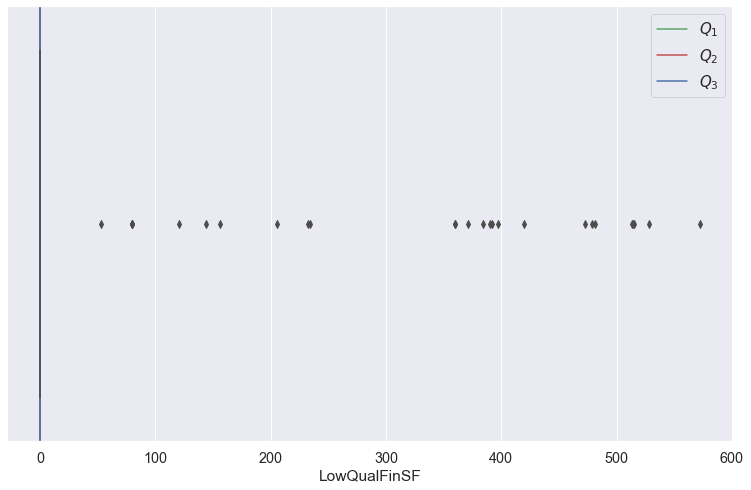

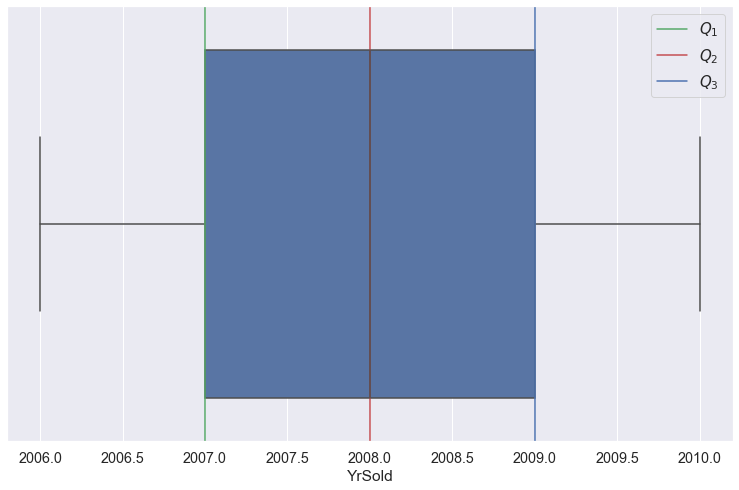

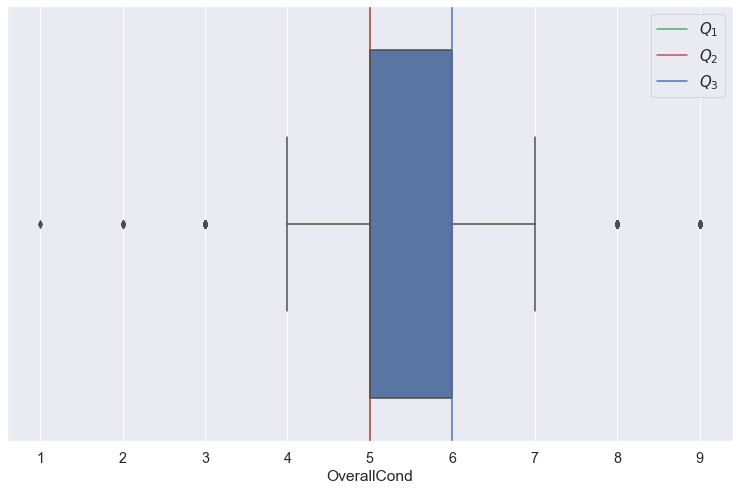

In [24]:
cols = ['EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']

for i in cols:
    fig, ax = plt.subplots(figsize = (13, 8))

    sns.boxplot(x = df_train[i], ax = ax)
    ax.axvline(np.percentile(df_train[i], 25), color = 'g', label = '$Q_1$')
    ax.axvline(np.percentile(df_train[i], 50), color = 'r', label = '$Q_2$')
    ax.axvline(np.percentile(df_train[i], 75), color = 'b', label = '$Q_3$')
    ax.legend(prop = {'size' : 15});

Lo siguiente, que haremos, será identificar los datos atipicos.

In [25]:
cols_1 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
cols_2 = ['EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']

for i in cols_1:
    q1 = np.percentile(df_train[i], 25)
    q2 = np.percentile(df_train[i], 50)
    q3 = np.percentile(df_train[i], 75)
    iqr = q3 - q1
    globals()['outliers_'+str(i)] = np.where((df_train[i] < q1 - 1.5 * iqr) | (df_train[i] > q3 + 1.5 * iqr))
    
for i in cols_2:
    q1 = np.percentile(df_train[i], 25)
    q2 = np.percentile(df_train[i], 50)
    q3 = np.percentile(df_train[i], 75)
    iqr = q3 - q1
    globals()['outliers_'+str(i)] = np.where((df_train[i] < q1 - 1.5 * iqr) | (df_train[i] > q3 + 1.5 * iqr))

In [26]:
outliers_SalePrice

(array([  30,  178,  185,  375,  410,  440,  495,  533,  636,  691,  705,
         710,  769,  798,  803,  812,  898,  916,  968, 1046, 1100, 1169,
        1182, 1243, 1325, 1337, 1373, 1380], dtype=int64),)

Si quisieramos hacer un analisis por variable, se genero la siguiente función

In [27]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [28]:
#df_train_0 = remove_outlier(df_train, 'SalePrice')

In [29]:
#df_train_0.shape

Pero con el fin de hacer un analisis mas profundo, y detectaremos datos atipicos considerando dos variables 

In [30]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#función para vizualisar el grafico de dispersión entre una función y el precio de venta
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Disperción de "+ a + " y SalePrice")
    plt.show()

<Figure size 864x864 with 0 Axes>

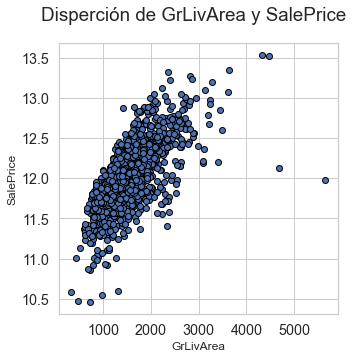

In [31]:
scatter_plot('GrLivArea')

Notemos que existen datos atipicos, por lo cual serán removidos

In [32]:
df_train =  df_train.drop( df_train[( df_train['GrLivArea'] > 4000) & ( df_train['SalePrice']<300000)].index)


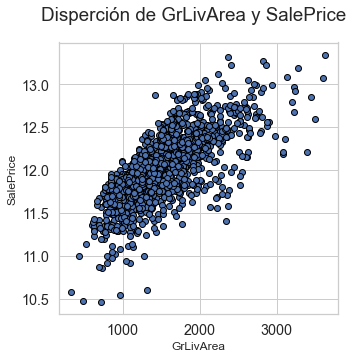

In [33]:
scatter_plot('GrLivArea')

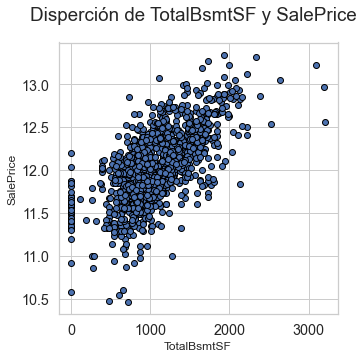

In [34]:
scatter_plot('TotalBsmtSF')

No hay valores atípicos demasiado grandes, no necesitamos eliminar ningún punto

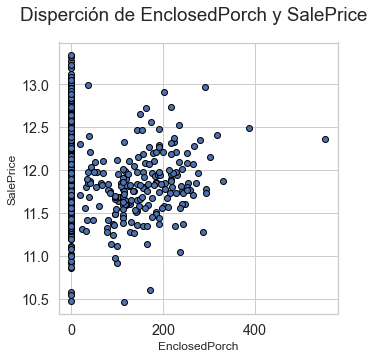

In [35]:
scatter_plot('EnclosedPorch')

Hay algunos valores atípicos que deben eliminarse para que no afectan a nuestras predicciones mucho

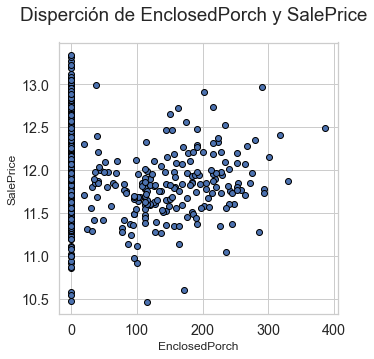

In [36]:
df_train =  df_train.drop( df_train[( df_train['EnclosedPorch']>400)].index)
df_train =  df_train.drop( df_train[( df_train['SalePrice']>700000)].index)
scatter_plot('EnclosedPorch')

El analisis anterior lo podriamos extender a todas las variables, pero obviaremos ya que solo eliminaremos los datos atipicos de la variable objetivo.

## Analisis por variable objetivo vs. variables categoricas

Por experiencia, se sabe que entre mejor sea la $calidad$ y $materiales$ que se ocupan en alguna obra, mayor será su valor, por lo tanto analisemos si existe dicha relación.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

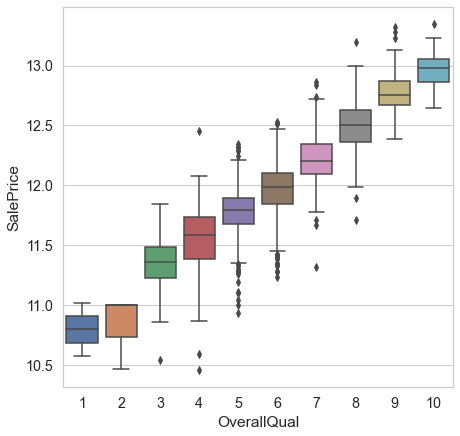

In [37]:
# boxplot para la variable categorica : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

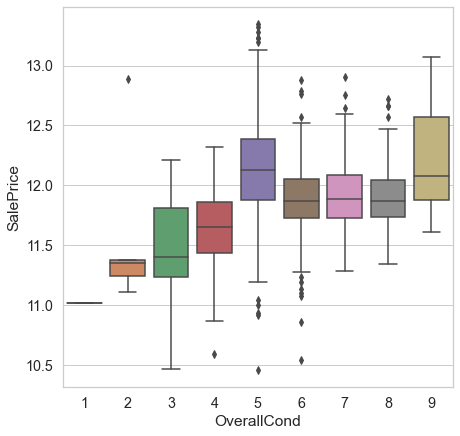

In [38]:
# boxplot para la variable categorica : OverallCond

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallCond']], axis=1)
sns.boxplot(x = df_train['OverallCond'], y="SalePrice", data = data)

Note que para el primer grafico, que hace referencia a la calidad de materiales, se nota un incremento en el precio conforme aumenta dicha calidad de materiales, pero al visualizar la calificación del estado final de la vivienda, no se logra visualizar que realmente valgan ese precio.

## Limpieza de datos missing

Para este apartado se diseño una función que ayuda a identificar los datos missing

In [39]:
#función para ver los datos faltantes en un marco de datos
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total de datos faltantes
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % de datos faltantes
    No_unique_val = df.nunique()                                   # datos no unicos
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total de datos faltantes', '% de datos faltantes','Valores no unicos'], sort = False)
    
    print(missing_data.head(n))

In [40]:
missing_data(df_train,20)

              Total de datos faltantes  % de datos faltantes  \
PoolQC                            1451             99.725086   
MiscFeature                       1401             96.288660   
Alley                             1364             93.745704   
Fence                             1176             80.824742   
FireplaceQu                        690             47.422680   
LotFrontage                        259             17.800687   
GarageYrBlt                         81              5.567010   
GarageCond                          81              5.567010   
GarageType                          81              5.567010   
GarageFinish                        81              5.567010   
GarageQual                          81              5.567010   
BsmtExposure                        38              2.611684   
BsmtFinType2                        38              2.611684   
BsmtCond                            37              2.542955   
BsmtQual                            37  

Lo anterior nos permite vizualizar todas las variables que tienen datos faltantes, las mas relevantes son:

* PoolQC
* MiscFeature
* Alley
* Fence
* FireplaceQu
* LotFrontage

Visualicemos los tipos de datos que contiene cada variable:

In [41]:
var_aux = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',  'FireplaceQu', 'LotFrontage']

for i in var_aux:
    print(df_train[i].unique())


[nan 'Fa' 'Gd']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'Grvl' 'Pave']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79.  99.  67.  83.  43. 103. 174.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106.  42.  39. 104.
 144. 114. 128. 149. 313. 168. 182. 138. 152. 124. 153.  46.]


Notemos que las primeras 5 variables, corresponden a variables categoricas, pero por su alto porcentaje de datos faltantes, serán descartadas. Por otro lado, la ultima variable es una variable numerica, por lo cuál, se le aplicará un tratamiento de inputación mas adelnate.

Algo importante a resaltar de la función anterior es que nos permite identificar cuantos valores unicos tiene, esto no ayuda para ver si es una variable categorica.

In [42]:
df_train['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [43]:
# Cantidad de datos faltantes en train_df
null_train = df_train.isnull().sum().sum()
print(null_train)

# Cantidad de datos faltantes en test_df
null_test = df_test.isnull().sum().sum()
print(null_test)

6950
7000


In [44]:
# guardar la columna 'SalePrice' como train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# eliminar la columna 'SalePrice' de df_train
df_train = df_train.drop(['SalePrice'], axis=1)

In [45]:
# Función que elimina o modifica los datos faltantes 
def missing (df):
    
    # Elimina estas columnas debido a grandes valores nulos o muchos mismos valores
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Valor nulo probablemente significa No vaya así que rellene como "ninguna"
    df["Fence"] = df["Fence"].fillna("Ninguna") 
    
    # Valor nulo probablemente significa No Chimenea para llenar como "Ninguno"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("Ninguno")
    
    # Frente de lote es los pies de la calle conectado a la propiedad, que es probablemente
    # similar a las casas del barrio, por lo que llenar por la media
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Valor nulo probablemente significa tipo
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Imputamos por la moda, ya que es una variable categorica 
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Imputamos por la moda, ya que es una variable categorica 
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Imputamos por la moda, ya que es una variable categorica 
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Valor nulo probablemente significa que no hay revestimiento de mampostería
    df["MasVnrType"] = df["MasVnrType"].fillna("Ninguno") # Por lo tanto rellenamos con ninguno
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #Al igual con cero
    
    # Imputamos por la moda
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    # MSZoning es la clasificación general de zonificación, muy poco valor nulo por lo que llenar con el valor más frecuente (moda)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    # Valor nulo probablemente significa que no hay tipo identificado de vivienda por lo que llenar como "Ninguno"
    df['MSSubClass'] = df['MSSubClass'].fillna("Ninguno")
    
    #Valor nulo probablemente significa No Garaje, así que rellene como "Ninguno" (ya que estas son características categóricas)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('Ninguno')
    
    # Valor nulo probablemente significa No Garaje y no hay coches en el garaje, por lo que llenar como 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Valor nulo probablemente significa No Sótano, por lo que llenar como 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Valor nulo probablemente significa No Sótano, por lo que llenar como "Ninguno" (ya que estas son características categóricas)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('Ninguno')
    
    return df

Aqui recordemos, que aplicaremos el modelo tanto a la base con datos atipicos y sin ellos, por lo tanto aplicamos la función anterior a las 3 bases de datos.

In [46]:
df_train = missing(df_train)
df_test = missing(df_test)

In [47]:
# calcular el número total de valores faltantes en df_train
null_train = df_train.isnull().sum().sum()
print(null_train)


# calcular el número total de valores faltantes en test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [48]:
df_train.shape, df_test.shape

((1455, 75), (1459, 75))

## Creación de nuevas columnas  y modificación de variables

Dada la descripción del inicio, podemos generar una columna concierando la suma de las siguientes columnas 
* TotalBsmtSF, 1stFlrSF y 2ndFlrSF
* FullBath, HalfBath, BsmtFullBath y BsmtHalfBath
* OpenPorchSF, 3SsnPorch, EnclosedPorch, ScreenPorch y WoodDeckSF
* BsmtFinSF1, BsmtFinSF2, 1stFlrSF y 2ndFlrSF
* OverallQual y OverallCond

In [49]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [50]:
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [51]:
df_train.shape, df_test.shape

((1455, 80), (1459, 80))

Uno de nuestros principales objetivos es predecir el precio de una vivienda, por lo tanto, aplicaremos el concepto de variables $dummy$ o variables $idicadoras$. Esto con el fin que el modelo identifique cuando entre algun nivel categerico de alguna variable categorica.

In [52]:
#obtener valores dummy para datos categóricos
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1455, 293)
(1459, 279)


In [53]:
# alinear los datos de entrenamiento y pruebas
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [54]:
print(df_train.shape)
print(df_test.shape)

(1455, 279)
(1459, 279)


In [55]:
null_train = df_train.isnull().sum().sum()
print(null_train)

null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


# Modelo(s)



Ahora generemos nuestros datos de entrenamiento y validación.

In [56]:
X_test = df_test #funciones de prueba

In [57]:
df_train["SalePrice"] = train_label

In [58]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,1,0,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,0,1,0,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,1,0,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,0,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,1,0,12.429216


In [59]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # funciones de entrenamiento
y_train = train_set["SalePrice"].copy()             # etiqueta para la prueba

X_valid = valid_set.drop(["SalePrice"], axis=1)  # funciones de entrenamiento
y_valid = valid_set["SalePrice"].copy()               #  etiqueta para la prueba


In [60]:
X_valid.head(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1021,20,64.0,7406,7,5,2006,2006,84.0,684,0,...,0,1,0,0,0,0,0,0,0,1
1022,50,52.0,9439,5,5,1930,1950,0.0,324,0,...,0,0,0,1,0,0,0,0,1,0
1023,120,43.0,3182,7,5,2005,2006,14.0,16,0,...,0,0,0,1,0,0,0,0,1,0
1024,20,69.0,15498,8,6,1976,1976,0.0,1165,400,...,0,0,0,0,1,0,0,0,0,0


In [61]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 279)
y_train shape: (1018,)

X_valid shape: (437, 279)
y_valid shape: (437,)

X_test shape: (1459, 279)


In [62]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1016    12.271345
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
Name: SalePrice, Length: 1018, dtype: float64

In [63]:
y_valid

1021    12.567237
1022    11.630709
1023    12.028739
1024    12.588191
1025    11.561716
          ...    
1455          NaN
1456          NaN
1457          NaN
1458          NaN
1459          NaN
Name: SalePrice, Length: 437, dtype: float64

In [64]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [65]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
5


In [66]:
np.where(np.isnan(y_valid))

(array([432, 433, 434, 435, 436], dtype=int64),)

In [67]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [68]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [69]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(437, 279) (437,)



## Validación cruzada

Para esté analices aplicaremos em metodo de validación cruzada con el fin de evaluar los resultados de nuestro analisis y garantizar que son independientes de la partición entre datos de entrenamiento y prueba.

In [70]:
# Cálculo de la puntuación de validación cruzada 
#con puntuación ajustada a error absoluto medio negativo

def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

## Error cuadratico medio
 
Además aplicaremos la función del error cuadratico medio.

In [71]:
def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)


In [72]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):
    
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()


## Modelos con datos atipicos
### Regresión lineal

In [73]:
reg = linear_model.LinearRegression()

In [74]:
cross_validation(reg)

Mean CV score:  0.4746902467763583


In [75]:
#Entenamos el modelo 
model_reg = reg.fit(X_train, y_train)

#Valores que predice el modelo para entrenamiento 
y1_pred = reg.predict(X_train)

# calcilo del error cuadratico medio
rmse(y1_pred,y_train)


rmse:  0.3438610544722426


In [76]:
#Valores que predice el modelo para validación
y1_pred_v = reg.predict(X_valid)

#calcilo del error cuadratico medio
rmse(y1_pred_v, y_valid)


rmse:  0.42725618696108586


<Figure size 864x864 with 0 Axes>

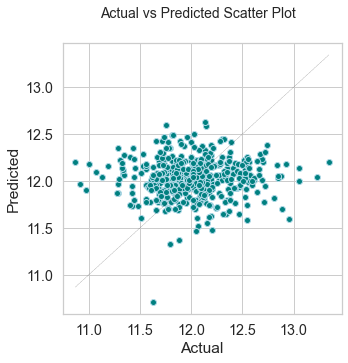

In [77]:
#grafico
actual_vs_pred_plot(y_valid,y1_pred_v)

### MODELO Lasoo




In [78]:
# para encontrar el mejor valor de alphas de esta lista, usaré LassoCV
# está lista puede ser aleatoria, 
alpha2 = [0.0001, 0.0002, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

#utilizar un escalador robusto para que las predicciones no se vean influidas por un pequeño 
#número de valores atípicos marginales muy grandes

lasso = make_pipeline(RobustScaler(), linear_model.LassoCV(alphas = alpha2, random_state=42,cv=12,max_iter=2000))

In [79]:
cross_validation(lasso)

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.59280923080454, tolerance: 0.014062005916392917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.73814181681166, tolerance: 0.01388682924653013
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.01741114402399, tolerance: 0.014074783611391048
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\skl

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.46729605999934, tolerance: 0.013525788400155336
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.40676368858856, tolerance: 0.014045010447412219
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.69096384643538, tolerance: 0.01349762647587234
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\skl

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.40478688799859, tolerance: 0.01378831205192525
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.4055262637188, tolerance: 0.013919654587606599
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.62539899370158, tolerance: 0.013532427064856805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\skle

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.87225340392318, tolerance: 0.013670641764035776
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.25353856890722, tolerance: 0.013274768016506627
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.53512586314956, tolerance: 0.013554451504562406
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sk

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.160668942932176, tolerance: 0.014158251392731108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.9648977155617, tolerance: 0.01455725816168879
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.70606007197756, tolerance: 0.014200132137281211
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\skl

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.13634662420219, tolerance: 0.013883915191350321
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1389757115159256, tolerance: 0.013883915191350321
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1499704920687606, tolerance: 0.013883915191350321
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\s

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.972787903079123, tolerance: 0.014044429363342392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.858520448725145, tolerance: 0.014044429363342392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.001635839627092, tolerance: 0.013655130098633712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\

Mean CV score:  0.42984976903749605


C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.9607630291156, tolerance: 0.014059197139630457
  model = cd_fast.enet_coordinate_descent_gram(


In [80]:

model_lasso = lasso.fit(X_train, y_train)

y3_pred = lasso.predict(X_train)

rmse(y3_pred,y_train)

C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.044290547216114, tolerance: 0.015151270252779393
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.418225750854077, tolerance: 0.015366965177081287
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.21187319249469, tolerance: 0.015214986226185617
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\

rmse:  0.36260550408847053


C:\Users\fjza9\.conda\envs\spyder5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.32993782750746, tolerance: 0.015372083714337646
  model = cd_fast.enet_coordinate_descent_gram(


In [81]:

y3_pred_v = lasso.predict(X_valid)

rmse(y3_pred_v, y_valid)


rmse:  0.4058586832817921


<Figure size 864x864 with 0 Axes>

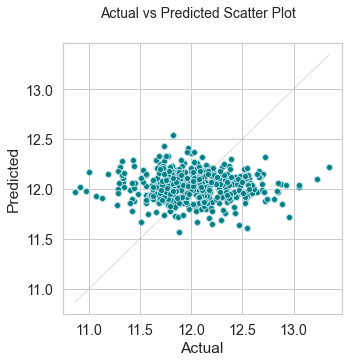

In [82]:
actual_vs_pred_plot(y_valid,y3_pred_v)

### Arbol de decisión

In [83]:
# ajustar la profundidad máxima a 5
tree_regr1 = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf=5,random_state=42)

# ajustar la profundidad máxima a 9
tree_regr2 = tree.DecisionTreeRegressor(max_depth = 9,min_samples_leaf=9,random_state=42)


tree_regr11 = tree_regr1.fit(X_train,y_train)
tree_regr12 = tree_regr2.fit(X_train,y_train)

y1 = tree_regr1.predict(X_train)
y2 = tree_regr2.predict(X_train)

In [84]:
cross_validation(tree_regr1)
cross_validation(tree_regr2)

Mean CV score:  0.44351431440248495
Mean CV score:  0.4584291945505277


In [85]:

rmse(y1,y_train)

rmse:  0.3238501847516405


In [86]:
rmse(y2,y_train)

rmse:  0.319434991726199


In [87]:

y5_pred_v = tree_regr2.predict(X_valid)


rmse(y5_pred_v, y_valid)



rmse:  0.45816527813069785


<Figure size 864x864 with 0 Axes>

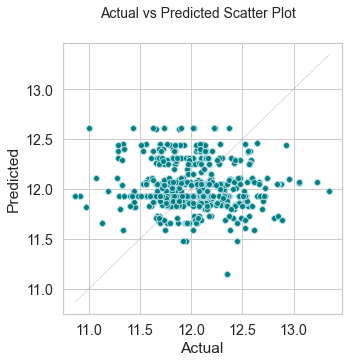

In [88]:

actual_vs_pred_plot(y_valid,y5_pred_v)

### Bosque aleatorio 

Mi compu no lo corrio 

In [89]:
#rforest = RandomForestRegressor(n_estimators=200,max_depth=13,random_state=42)

In [90]:
#param_grid  = {'n_estimators': [100,150,200,250,300,350,400],
               #'max_depth': [5,7,9,11,13,15,17], 
               #'min_samples_leaf': [3,5,7,9,11,13,15]}


#clf = GridSearchCV(rforest, param_grid, cv = 5, n_jobs = -2)
#clf.fit(X_train,y_train)

In [91]:
#clf.best_params_

In [92]:
#rforest = RandomForestRegressor(n_estimators=, max_depth=5, min_samples_leaf=3, random_state=42)

In [93]:
#cross_validation(rforest)

In [94]:

#model_rforest = rforest.fit(X_train, y_train)

#y6_pred = rforest.predict(X_train)

#rmse(y6_pred,y_train)

In [95]:

#y6_pred_v = rforest.predict(X_valid)


#rmse(y6_pred_v, y_valid)

In [96]:

#actual_vs_pred_plot(y_valid, y6_pred_v)

## Conclusiónes

### Comparar errores 



<html>
<body>

<h1>Errores cuadraticos medios</h1>

<table>
<tr>
    <th>Modelo</th>
    <th>ERM entrenamiento</th>
    <th>ERM validación</th>
</tr>

<tr>
    <td>Regresión lineal</td>
    <td>0.0.3438610544722426  </td>
    <td>0.42725618696108586</td>
</tr>

<tr>
    <td>Modelo Lasso</td>
    <td>0.36260550408847053 </td>
    <td>0.4058586832817921</td>
</tr>

<tr>
    <td>Arbol de desición </td>
    <td>0.3238501847516405, 0.319434991726199 </td>
    <td>0.45816527813069785</td>
</tr>
</table>

</body>
</html>


# Modelos aplicados a los datos de sample_submission

In [97]:
df_sub = pd.read_csv('Data/sample_submission.csv', sep = ',')  

In [98]:
df_sub.shape

(1459, 2)

In [99]:
df_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [100]:
X_test.shape

(1459, 279)

In [101]:

y_final_pred = lasso.predict(X_test)

y_final_pred


array([11.93709865, 12.26468829, 11.8807385 , ..., 12.03871925,
       11.86699596, 12.165125  ])

In [102]:
#deshacer la tranformación de log para obtener predicciones en términos de etiqueta original
predictions = np.expm1(y_final_pred)
print(predictions)

[152831.62539928 212072.52032178 144456.19316714 ... 169179.12401442
 142484.5629697  191974.87741837]


In [103]:
submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = predictions
submit.to_csv('submission.csv',index=False)

In [104]:
submit

,Id,SalePrice
0,1461,152831.625399
1,1462,212072.520322
2,1463,144456.193167
3,1464,160281.258825
4,1465,176756.341919
...,...,...
1454,2915,136252.885374
1455,2916,146670.130852
1456,2917,169179.124014
1457,2918,142484.562970
